# Twitter Sentiment Analysis on tweets of narendra modi

## Extracting Tweets using tweepy(Twitter API)

In [1]:
# installing tweepy - twitter API
!pip install tweepy

In [2]:
# Installing Preprocessing library
!pip install --upgrade gensim

     |████████████████████████████████| 23.9MB 139kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
# Installing tweet preprocessing library
!pip install tweet-preprocessor

In [4]:
# Importing various libraries
from tweepy import *
import tweepy
import pandas as pd
import csv
import re 
import string
import preprocessor as p
import numpy as np
import matplotlib.pyplot as plt
import nltk
from gensim.parsing.preprocessing import remove_stopwords
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Setting keys and tokens
consumer_key = "JJatJX0rF2L9AVLSHgTOMLtKo"
consumer_secret = "hHQU56dCwDxW62HtBjVtJDaFeVZHuWQwGTle3nMR10KWM7ckyH"
access_key= "929805864885665792-KaelsIy30IzWUvfdlOsfzEfT9iY5259"
access_secret = "ywwG3F2n4zceIwcRs32Ncmt0ZF77AqzP7qXqNQSylp3U6"

In [7]:
# Getting access to API by keys and tokens
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)

In [8]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [9]:
# Serching words related to narendra modi
# -filter:retweets - blocking retweets 
search_words1 = "@narendramodi" + " -filter:retweets"
new_search1 = search_words1
date_since = "2018-11-16"

In [10]:
new_search1

'@narendramodi -filter:retweets'

In [11]:
# Searching tweets with search word
tweets1 = tweepy.Cursor(api.search,
              q=new_search1,
              lang="en",
              since=date_since).items(3000)
tweets1

In [12]:
# Extracting info of tweets
users_locs1 = [[tweet.user.screen_name,tweet.user.description,tweet.user.followers_count,tweet.user.location,tweet.text] for tweet in tweets1]

In [13]:
# Storing tweets in a dataframe
tweet_text1 = pd.DataFrame(data=users_locs1, 
                    columns=['user', "description","followers","location", "text"])

In [14]:
tweet_text1

,user,description,followers,location,text
0,shubhshaurya1,Believes in Gandhian and Nehruvian ideology🙂. ...,4687,"Chennai, India",@sunmor2901 @sambitswaraj @narendramodi Perfec...
1,vasiullahkhan1,sirf naam hi kafi he,21,,@narendramodi Corona free jone 😁😁😁
2,the_shivansh_,| सत्यमेव जयते 🇮🇳 |\n| For The People |\n| Law...,43,"Allahabad, India",@vikasjitiwari @SanjaySGaharwar @narendramodi ...
3,cdmpatra,Your Fellow Passenger of Time. Infinity Focuse...,102,"Mumbai, India",@sarf7a9z @ejazhaider @ImranKhanPTI @narendram...
4,Seek_Er1,,133,Corona hotspot of the world,@razumikhin888 @bkum2000 @narendramodi Sanghis...
...,...,...,...,...,...
2995,atulzlv,,31,"Patna, Bihar, India, World",@BJP4India @narendramodi @narendramodi what ab...
2996,farhaz98,‏‏بول کہ سچ زندہ ہے اب تک،بول جو کچھ کہنا ہے ک...,302,BOM➡️MAA➡️DEL➡️LKO➡️LHE➡️LGW,@chanakyadgreat @CTRavi_BJP @narendramodi DMK ...
2997,kori_vish,A SOUTH INDIAN .FROM KARNATAKA .LOVES ONLY TRU...,110,,"@sambitswaraj @narendramodi Probably,you have ..."
2998,Shubh_am_Soni,Tweets: Usually political opinion.\nRTs: Impor...,101,"Bengaluru, India",@SriPa9 @TimesNow @ImranKhanPTI @narendramodi ...


In [ ]:
tweet_text1.to_csv(r"C:\Users\vaibh\OneDrive\Documents\Twitter_data.csv")

In [ ]:
Df = tweet_text1
Df

In [ ]:
Df.info()

In [ ]:
# Extracting tweets from second search word.
search_words2 = "#narendramodi" + " -filter:retweets"
new_search2 = search_words2
date_since = "2018-11-16"

In [ ]:
tweets2 = tweepy.Cursor(api.search,
              q=new_search2,
              lang="en",
              since=date_since).items(3000)
tweets2

In [ ]:
users_locs2 = [[tweet.user.screen_name,tweet.user.description,tweet.user.followers_count,tweet.user.location,tweet.text] for tweet in tweets2]

In [ ]:
tweet_text2 = pd.DataFrame(data=users_locs2, 
                    columns=['user', "description","followers","location", "text"])

In [ ]:
tweet_text2

In [ ]:
Df = pd.concat([tweet_text,tweet_text2], axis = 0, ignore_index=True)

In [ ]:
Df

In [ ]:
# Saving dataframe in csv format
Df.to_csv(r"C:\Users\vaibh\OneDrive\Documents\Twitter_data.csv")

## Preprocessing

In [15]:
Df = pd.read_csv(r"/content/drive/MyDrive/Twitter_data.csv")

In [17]:
Df.count()

Unnamed: 0     6000
user           6000
description    5014
followers      6000
location       4057
text           6000
dtype: int64

Dropping duplicates and NaN from the dataframe

In [18]:
Df.count()

Unnamed: 0     6000
user           6000
description    5014
followers      6000
location       4057
text           6000
dtype: int64

In [19]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6000 non-null   int64 
 1   user         6000 non-null   object
 2   description  5014 non-null   object
 3   followers    6000 non-null   int64 
 4   location     4057 non-null   object
 5   text         6000 non-null   object
dtypes: int64(2), object(4)
memory usage: 281.4+ KB


In [20]:
# Unnamed is basically indexes in the data retrived from twitter. We can drop this.
Df = Df.drop(['Unnamed: 0'], axis = 1)


In [21]:
# description column basically represent description of users on twitter. Description can be anything so we will not get much information about sentiments from description.

In [22]:
# We can drop this column
Df = Df.drop(['description'], axis = 1)

In [23]:
Df = Df.drop_duplicates()

In [24]:
Df.count()

user         5950
followers    5950
location     4024
text         5950
dtype: int64

In [25]:
Df.head()

,user,followers,location,text
0,Kalpesh_Yadav_,41,India,@PradipK40388306 @dudesaurabh @narendramodi @B...
1,Yash_Vala_BJP,268,Rajkot India,Hon'ble PM Shri @narendramodi Ji hands over a ...
2,RahulKu51316643,1,NaN,"@DrRPNishank @narendramodi Sir., Covid 19 case..."
3,asthanacdri,146,"Lucknow, India",@MediaHarshVT @BJP4India @BJP4Punjab @capt_ama...
4,U2K2ADSH,231,NaN,@SupriyaShrinate @narendramodi Pidi SShrinate ...


In [26]:
# Location column represents the location of the users. Again location doesnot tell sentiments about narender modi. So, we can also drop this.
Df = Df.drop(['location'], axis = 1)

In [27]:
# We will also drop null values in text or user
Df = Df.dropna()

In [28]:
Df.count()


user         5950
followers    5950
text         5950
dtype: int64

In [29]:
Df.head(10)

,user,followers,text
0,Kalpesh_Yadav_,41,@PradipK40388306 @dudesaurabh @narendramodi @B...
1,Yash_Vala_BJP,268,Hon'ble PM Shri @narendramodi Ji hands over a ...
2,RahulKu51316643,1,"@DrRPNishank @narendramodi Sir., Covid 19 case..."
3,asthanacdri,146,@MediaHarshVT @BJP4India @BJP4Punjab @capt_ama...
4,U2K2ADSH,231,@SupriyaShrinate @narendramodi Pidi SShrinate ...
5,muskateer15,1,@JayathuB @Waniash1 @Swamy39 @DrRonMalka @nare...
6,Champ65764330,4,@imsinghabhi95 @Sandipsingh22 @AdityaRajKaul @...
7,bipbhat,936,@KrishanuKar14 @poll_diary @BJP4Bengal @INCWes...
8,Abhiram49780861,0,@Fatima492090 @RaymoneJames4 @kammogyan @hassa...
9,kannan32,33,@ShashiTharoor @narendramodi Blind literate!!


In [30]:
Df.tail(10)

,user,followers,text
5990,Nijanandiakash,52,Most arrogant Prime Minister ever. \n\n#Narend...
5991,ashokbj7,60,In the end. Rahul never performed in Narendra ...
5992,ErRaazSaini1,5,Today Android play Store is not working...\n#N...
5993,capisces,218,@capisces's account has been withheld in India...
5994,RavinderKapur2,7118,@ShekharGupta \nWhat is your fixed salary you ...
5995,ErRaazSaini1,5,Today Android play Store is not working.\n#Nar...
5996,aditi_mili,333,@DilipGhoshBJP A without “FEAR”. A man with a ...
5997,ssuman_raaj,4,Evey Farmer With PM Modi \n#NarendraModi jinda...
5998,pratidintime,87105,#REGIONAL | PM Modi To Campaign For AGP Leader...
5999,SocioPoliticalW,618,@SaptasindhuBasu @stanalb Feeling bad to watch...


Applying tweet preprocessing first. Defining a preprocess function and using pandas to apply it on each value of 'text'. tweet preprocessing is very easy by the library name as preprocessor.

In [31]:
def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

In [32]:
Df['text'] = Df.apply(preprocess_tweet, axis=1)

Tweet has been cleaned to normal text.

In [33]:
Df.head(10)

,user,followers,text
0,Kalpesh_Yadav_,41,Only bjp2004-2014
1,Yash_Vala_BJP,268,Hon'ble PM Shri Ji hands over a representation...
2,RahulKu51316643,1,"Sir., Covid cases kafi jyda aane lge hai.! Ple..."
3,asthanacdri,146,Shame on congress
4,U2K2ADSH,231,Pidi SShrinate durbari slaves can't be choosy....
5,muskateer15,1,I only see that I
6,Champ65764330,4,Canada have supplier vaccine with all of them?...
7,bipbhat,936,
8,Abhiram49780861,0,Search the Google with word Islam
9,kannan32,33,Blind literate!!


In [34]:
# By applying preprocessor, All URL's,Mentions,Hashtags,Emojis,Smileys,Spefic words etc.. are removed.
# Some Null values are created in the text.
# Replacing these null values to np.nan
Df['text'] = Df['text'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', np.nan)

In [35]:
Df.isnull().sum()

user           0
followers      0
text         353
dtype: int64

In [36]:
# dropping these null values as there are no information of this particular text
Df = Df.dropna()

In [37]:
Df.count()

user         5597
followers    5597
text         5597
dtype: int64

In [38]:
Df.head(10)

,user,followers,text
0,Kalpesh_Yadav_,41,Only bjp2004-2014
1,Yash_Vala_BJP,268,Hon'ble PM Shri Ji hands over a representation...
2,RahulKu51316643,1,"Sir., Covid cases kafi jyda aane lge hai.! Ple..."
3,asthanacdri,146,Shame on congress
4,U2K2ADSH,231,Pidi SShrinate durbari slaves can't be choosy....
5,muskateer15,1,I only see that I
6,Champ65764330,4,Canada have supplier vaccine with all of them?...
8,Abhiram49780861,0,Search the Google with word Islam
9,kannan32,33,Blind literate!!
11,banyarhein25,119,To I believe that India loves democracyand Ind...


In [39]:
# Removing stop words,digits and punctuations by using NLTK 
Df['text'] = Df['text'].str.lower().str.replace('\d+','')
Df['text'] = Df['text'].str.replace('[^\w\s]',' ')
Df['text'] = Df['text'].str.replace('\s\s+',' ')


In [40]:
def stopword_removal(row):
    text = row['text']
    text = remove_stopwords(text)
    return text

In [41]:
Df['text'] = Df.apply(stopword_removal, axis=1)

In [42]:
# Applying lemmatizer to the text
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
Df['text_lemmatized'] = Df.text.apply(lemmatize_text)

In [43]:
Df['text'].head(10)

0                                                   bjp
1     hon ble pm shri ji hands representational key ...
2     sir covid cases kafi jyda aane lge hai sir exa...
3                                        shame congress
4     pidi sshrinate durbari slaves t choosy check f...
5                                                      
6                               canada supplier vaccine
8                              search google word islam
9                                        blind literate
11    believe india loves democracyand india friends...
Name: text, dtype: object

In [44]:
Df['text_lemmatized'].head(10)

0                                                 [bjp]
1     [hon, ble, pm, shri, ji, hand, representationa...
2     [sir, covid, case, kafi, jyda, aane, lge, hai,...
3                                     [shame, congress]
4     [pidi, sshrinate, durbari, slave, t, choosy, c...
5                                                    []
6                           [canada, supplier, vaccine]
8                         [search, google, word, islam]
9                                     [blind, literate]
11    [believe, india, love, democracyand, india, fr...
Name: text_lemmatized, dtype: object

In [45]:
# Some null values are created by excluding stopwords
Df['text'] = Df['text'].apply(lambda x: x.strip() if isinstance(x, str) else x).replace('', np.nan)

In [46]:
Df.isnull().sum()

user                0
followers           0
text               33
text_lemmatized     0
dtype: int64

In [47]:
Df = Df.dropna()

In [48]:
# Saving preprocessed text in csv format
Df.to_csv(r"C:\Users\vaibh\OneDrive\Documents\Twitter_preprocessed_data.csv")

## Exploratory Data Analysis

In [49]:
Df['user'].value_counts()

Dirrrft            78
NEWS9TWEETS        58
SafiKhanMagical    56
imAnkeshanand      56
thefirstindia      51
                   ..
Rishabh44807551     1
TSRana97281730      1
TapanP1957          1
chet_chetna         1
Arnabgos079         1
Name: user, Length: 3256, dtype: int64

In [50]:
Df['user'].nunique()

3256

### WordCloud on Verbs, Adjectives and Adverbs

In [51]:
# Importing pos_tag from nltk lib
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [52]:
# assigning tags to each word in sentence.
Tagged_tokens = []
for index in Df.index:
    tagged_sub_tokens = nltk.pos_tag(Df['text_lemmatized'][index])
    Tagged_tokens.append(tagged_sub_tokens)

In [54]:
Tagged_tokens[0:10]

[[('bjp', 'NN')],
 [('hon', 'NN'),
  ('ble', 'JJ'),
  ('pm', 'NN'),
  ('shri', 'NN'),
  ('ji', 'NN'),
  ('hand', 'NN'),
  ('representational', 'JJ'),
  ('key', 'JJ'),
  ('life', 'NN'),
  ('saving', 'VBG'),
  ('ambulance', 'NN'),
  ('bangladesh', 'NN'),
  ('pm', 'NN'),
  ('s', 'NN')],
 [('sir', 'NN'),
  ('covid', 'NN'),
  ('case', 'NN'),
  ('kafi', 'VB'),
  ('jyda', 'NN'),
  ('aane', 'NN'),
  ('lge', 'NN'),
  ('hai', 'NN'),
  ('sir', 'NN'),
  ('exam', 'FW'),
  ('online', 'JJ'),
  ('mode', 'NN'),
  ('kr', 'NN'),
  ('dijiye', 'NN')],
 [('shame', 'NN'), ('congress', 'NN')],
 [('pidi', 'NN'),
  ('sshrinate', 'NN'),
  ('durbari', 'NN'),
  ('slave', 'VBP'),
  ('t', 'VBN'),
  ('choosy', 'JJ'),
  ('check', 'NN'),
  ('fact', 'NN'),
  ('bark', 'NN')],
 [('canada', 'NN'), ('supplier', 'NN'), ('vaccine', 'NN')],
 [('search', 'NN'), ('google', 'NN'), ('word', 'NN'), ('islam', 'NN')],
 [('blind', 'NN'), ('literate', 'NN')],
 [('believe', 'VB'),
  ('india', 'NN'),
  ('love', 'NN'),
  ('democracyand', 

In [ ]:
# Extracting verbs from tagged tokens
verbs = []
for index in Tagged_tokens:
    for (word,pos) in index:
        if(pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
            verbs.append(word)
verbs[:20]

['saving',
 'kafi',
 'slave',
 't',
 'believe',
 'vaccinated',
 'shown',
 'believe',
 'know',
 'kicking',
 's',
 'wearing',
 'belt',
 'shameful',
 'filling',
 'looking',
 'liked',
 'remember',
 'let',
 'going']

In [ ]:
# Installing word cloud
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

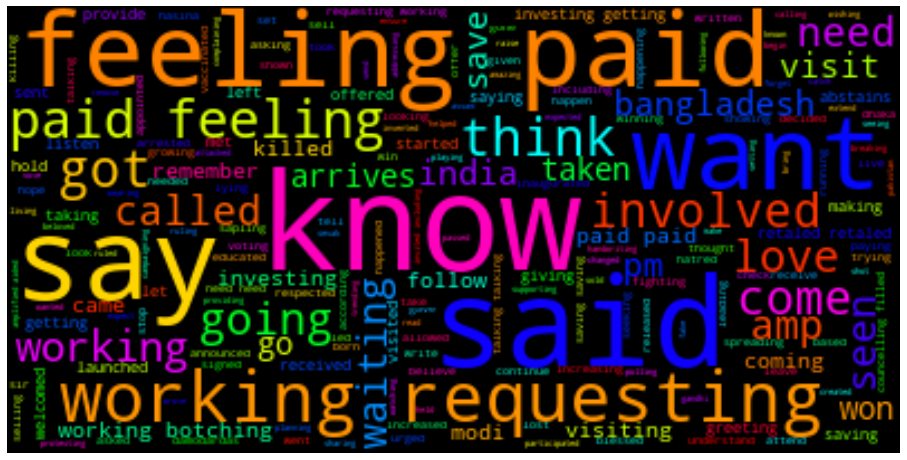

In [ ]:
# WordCloud on verbs
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(verbs))
plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Verbs like know, said, want , feeling, love, requesting, botching etc. are frequent verbs in the tweets.

In [ ]:
# Similarly for adjectives
adjectives = []
for index in Tagged_tokens:
    for (word,pos) in index:
        if(pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
            adjectives.append(word)
adjectives[:20]

['ble',
 'representational',
 'key',
 'online',
 'choosy',
 'latest',
 'earliest',
 's',
 'real',
 'negative',
 'hard',
 'english',
 'type',
 'illigal',
 'good',
 'happy',
 'honourable',
 'guy',
 'ug',
 'nd']

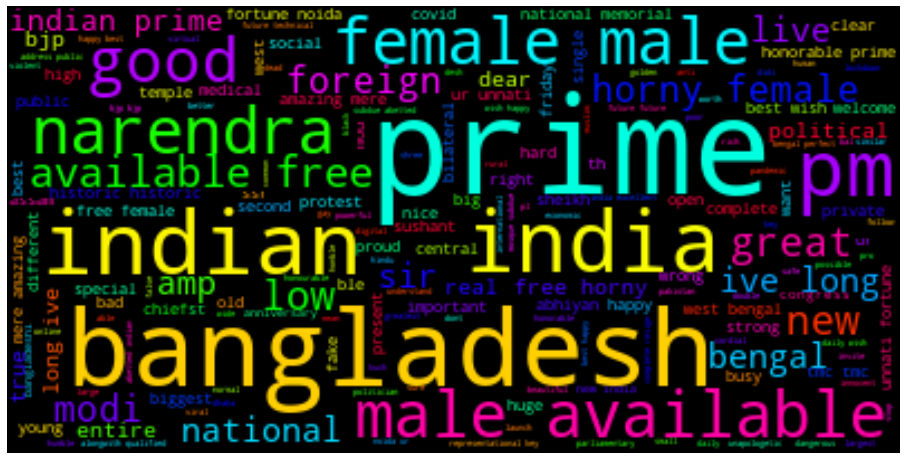

In [ ]:
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(adjectives))
plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Bangladesh, male, female, indian, national, live etc. are the most frequent adjectives in the tweets.

In [ ]:
adverbs = []
for index in Tagged_tokens:
    for (word,pos) in index:
        if(pos == 'RB'):
            adverbs.append(word)
adverbs[:20]

['uniquely',
 'finally',
 'forward',
 'instead',
 'right',
 'samewhat',
 'exactly',
 'maybe',
 'totally',
 'aha',
 'nice',
 'specially',
 'likewise',
 'andhbakth',
 'encroacher',
 'india',
 'freedom',
 'indirectly',
 'soon',
 'possibly']

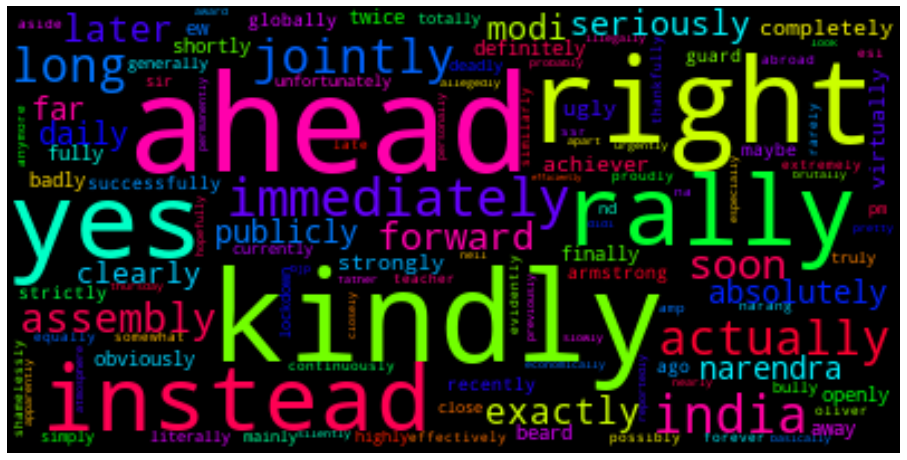

In [ ]:
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(adverbs))
plt.rcParams["figure.figsize"] = (16,12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Ahead, rally, right, kindly etc. are the most frequent adverbs 

## BERT for sentiment analysis

In [ ]:
# Installing transformers lib from huggingface
!pip install transformers

In [ ]:
# Installing tensorflow
!pip install tensorflow

In [55]:
Df.head(10)

,user,followers,text,text_lemmatized
0,Kalpesh_Yadav_,41,bjp,[bjp]
1,Yash_Vala_BJP,268,hon ble pm shri ji hands representational key ...,"[hon, ble, pm, shri, ji, hand, representationa..."
2,RahulKu51316643,1,sir covid cases kafi jyda aane lge hai sir exa...,"[sir, covid, case, kafi, jyda, aane, lge, hai,..."
3,asthanacdri,146,shame congress,"[shame, congress]"
4,U2K2ADSH,231,pidi sshrinate durbari slaves t choosy check f...,"[pidi, sshrinate, durbari, slave, t, choosy, c..."
6,Champ65764330,4,canada supplier vaccine,"[canada, supplier, vaccine]"
8,Abhiram49780861,0,search google word islam,"[search, google, word, islam]"
9,kannan32,33,blind literate,"[blind, literate]"
11,banyarhein25,119,believe india loves democracyand india friends...,"[believe, india, love, democracyand, india, fr..."
12,nksethi551,23,areas latest avg c,"[area, latest, avg, c]"


In [ ]:
# Extracting and downloading model weights of bert.
# Name of the model is - distilbert-base-uncased-finetuned-sst-2-english which is fine-tuned on a dataset called SST-2 for the sentiment analysis task.
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
# This model only exists in PyTorch, so we use the `from_pt` flag to import that model in TensorFlow.
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
from transformers import InputExample, InputFeatures

In [ ]:
# Converting text in tweets to input_ids and attention_masks for bert model by making a tf tensor.
features = []
for index in Df.index:
  tf_batch = tokenizer(
     [Df['text'][index]],
     padding=True,
     truncation=True,
     max_length=512,
     return_tensors="tf"
  )
  input_ids, attention_mask = (tf_batch["input_ids"],tf_batch["attention_mask"])
  features.append(
      tf_batch
  )
  
  

In [ ]:
# getting outputs in form of tensors.
outputs = []
for i in features:
  tf_outputs = model(i)
  outputs.append(tf_outputs)


In [ ]:
type(outputs[0])

transformers.modeling_tf_outputs.TFSequenceClassifierOutput

In [ ]:
import tensorflow as tf

In [ ]:
# Extracting sentiments from outputs by using softmax in tensorflow.
sentiments = []
for index in range(len(outputs)):
  tf_predictions = tf.nn.softmax(outputs[index][0], axis=-1)
  labels = ['Negative','Positive']
  label = tf.argmax(tf_predictions, axis=1)
  label = label.numpy()
  sentiments.append(labels[label[0]])



In [ ]:
sentiments[0:20]

['Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',

In [ ]:
len(sentiments)

5564

In [ ]:
Df['Sentiments'] = pd.DataFrame(sentiments)

In [ ]:
Df.reset_index(inplace = True, drop = True)

In [ ]:
Df.head(30)

,user,followers,text,text_lemmatized,Sentiments
0,Kalpesh_Yadav_,41,bjp,[bjp],Negative
1,Yash_Vala_BJP,268,hon ble pm shri ji hands representational key ...,"[hon, ble, pm, shri, ji, hand, representationa...",Positive
2,RahulKu51316643,1,sir covid cases kafi jyda aane lge hai sir exa...,"[sir, covid, case, kafi, jyda, aane, lge, hai,...",Negative
3,asthanacdri,146,shame congress,"[shame, congress]",Negative
4,U2K2ADSH,231,pidi sshrinate durbari slaves t choosy check f...,"[pidi, sshrinate, durbari, slave, t, choosy, c...",Negative
5,Champ65764330,4,canada supplier vaccine,"[canada, supplier, vaccine]",Negative
6,Abhiram49780861,0,search google word islam,"[search, google, word, islam]",Negative
7,kannan32,33,blind literate,"[blind, literate]",Negative
8,banyarhein25,119,believe india loves democracyand india friends...,"[believe, india, love, democracyand, india, fr...",Positive
9,nksethi551,23,areas latest avg c,"[area, latest, avg, c]",Positive


In [ ]:
import seaborn as sns

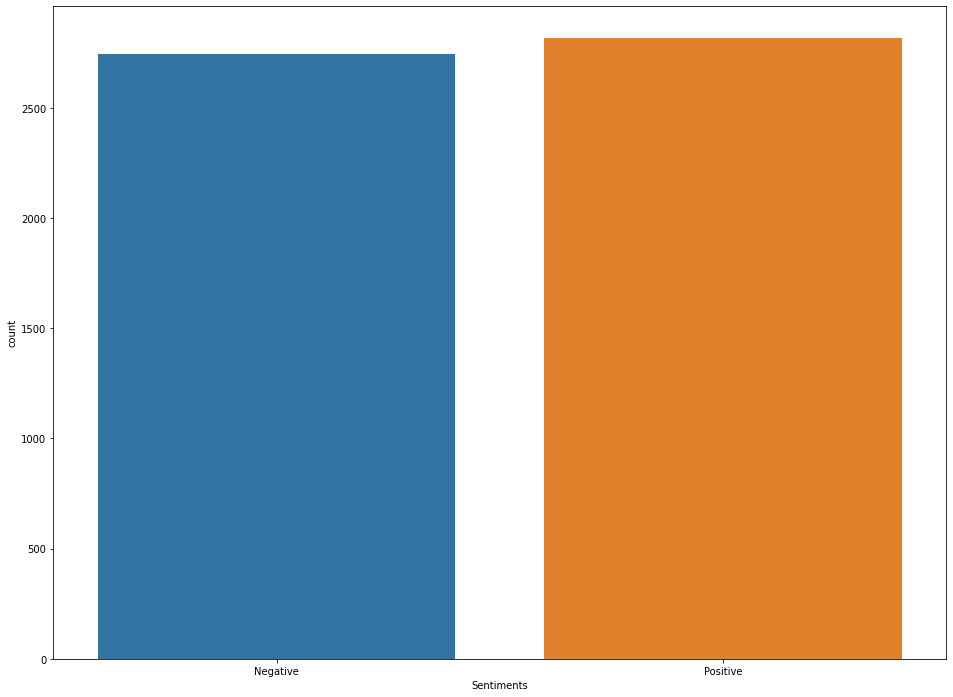

In [ ]:
sns.countplot(x = 'Sentiments',data = Df)

Positive sentiments are slightly greater than negative sentiments.
Performance of the model is average it is not much accurate because of the following reasons-


1.   The model used is not fine tuned with twitter dataset. In order to increase accuracy we have to train this model to a twitter dataset and then get predictions of our dataset .
2.   Some of the tweets are absurd so we can apply more powerful preprocessing techniques on the data.

